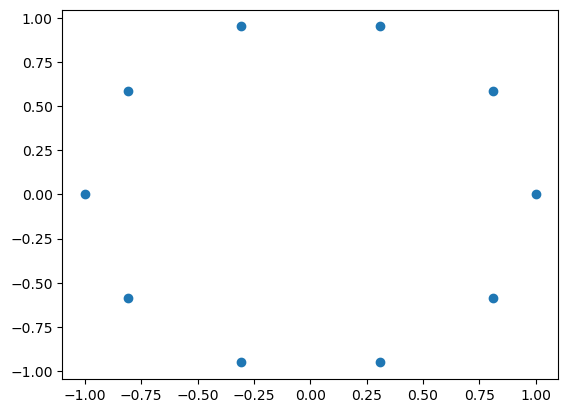

In [1]:
import numpy as np
import matplotlib.pyplot as plt
phase = [0]
L = 10
for i in range(1,L):
    phase.append(phase[i-1]+2*np.pi/L)
phase_array = np.array(phase, dtype="float64")
x = np.cos(phase_array)
y = np.sin(phase_array)

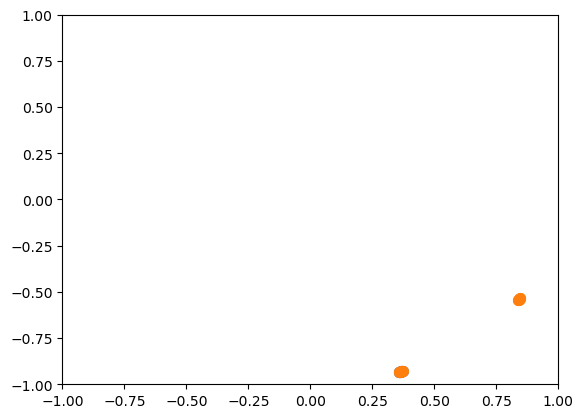

In [29]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import numpy as np 
  
   
# creating a blank window
# for the animation 
fig = plt.figure() 
axis = plt.axes(xlim =(-1, 1),
                ylim =(-1, 1)) 
  
line = axis.scatter([], [], lw = 2) 

phase = [0]
L = 10
A = 1
w = np.pi/4
# what will our line dataset
# contain?
def init():
    for i in range(1,L):
        phase.append(phase[i-1]+2*np.pi/L)
    phase_array = np.array(phase, dtype="float64")
    x = np.cos(phase_array)
    y = np.sin(phase_array)
    line = axis.scatter(x, y, lw = 2) 
    return line
   
def get_phase(phase):
    for i in range(L):
        s=0
        for j in range(L):
            if i != j:
                s += np.sin(phase[i]-phase[j])
        phase[i] = phase[i] + 0.02*(w - A*s)
    phase_array = np.array(phase, dtype="float64")
    x = np.cos(phase_array)
    y = np.sin(phase_array)
    return x,y
# initializing empty values
# for x and y co-ordinates
# animation function 
def animate(i):
    axis.clear()
    x,y = get_phase(phase)
    line = axis.scatter(x, y, lw = 2)
    axis.set_xlim((-1,1))
    axis.set_ylim((-1,1))
    return line
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func = init, interval = 20,frames=500) 

anim.save('ani3.gif',writer='pillow',fps=10)

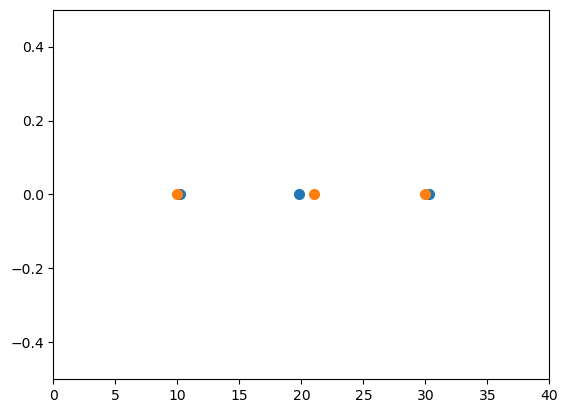

In [22]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.animation as animation 
from scipy.integrate import odeint
fig = plt.figure() 
axis = plt.axes(ylim =(-1, 1)) 

d = 15

y = [0,0,0]

def vectorfield(w, t, p):
    x = [0] + [w[i] for i in range(len(w)) if i % 2 == 0] + [0]
    y = [w[i] for i in range(len(w)) if i % 2 != 0]
    f = []
    for i in range(len(w) // 2):
        f.append(y[i])
        f.append((-p[0][i]*(x[i+1]-x[i]) + p[0][i+1]*(x[i+2]-x[i+1]))/p[1][i])
    return f
    
t = np.arange(0,10.22,0.02)
p = [[800,900,500,800],[10,15,20]]
w0 = [0,0,1,0,0,0]
d = 10
y = [0,0,0]
abserr = 1.0e-8
relerr = 1.0e-6

wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)   

def init():
    w = [w0[k] for k in range(len(w0)) if k % 2 == 0]
    x = [(i+1)*d + w[i] for i in range(len(w))]
    line = axis.scatter(np.array(x), y, lw = 2) 
    return line
   


def get_x(wsol,d,j):
    w = [wsol[j][k] for k in range(len(wsol[j])) if k % 2 == 0]
    x = [(i+1)*d + w[i] for i in range(len(w))]
    return x    

def animate(i):
    axis.clear()
    x = get_x(wsol,d,i)
    line = axis.scatter(np.array(x), y, lw = 2)
    axis.set_ylim((-0.5,0.5))
    axis.set_xlim((0,40))
    return line
   
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, init_func = init, interval = 20,frames=500) 

anim.save('ani3.gif',writer='pillow',fps=10)